<a href="https://colab.research.google.com/github/vegaangga/PCVK_Genap_2022/blob/main/tomato_diseases.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

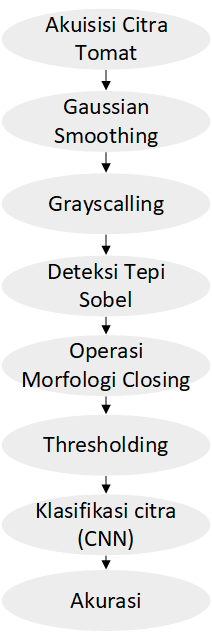

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
from tqdm import tqdm
import pathlib
import random
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from math import log10, sqrt
from PIL import Image
import glob

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# direktori data training
Images = '/content/drive/MyDrive/Colab Notebooks/PCVK_2022/FinalProject/Dataset/training/'

# List folder
os.listdir(Images)

['Tomato_Bacterial_spot', 'Tomato_Early_blight']

In [ ]:
# simpan gambar ke Tomato_Early_blight untuk kategori Tomato_Early_blight
img_Tomato_Early_blight = []
for img_Early in glob.glob('/content/drive/MyDrive/Colab Notebooks/PCVK_2022/FinalProject/Dataset/training/Tomato_Early_blight/*'):
  n = cv2.imread(img_Early)
  img_Tomato_Early_blight.append(n)

print(len(img_Tomato_Early_blight))

100


In [ ]:
# simpan gambar ke Tomato_Bacterial_spot untuk kategori Tomato Bacterial spot
img_Tomato_Bacterial_spot = []
for img_Bacterial in glob.glob('/content/drive/MyDrive/Colab Notebooks/PCVK_2022/FinalProject/Dataset/training/Tomato_Bacterial_spot/*'):
  n = cv2.imread(img_Bacterial)
  img_Tomato_Bacterial_spot.append(n)

print(len(img_Tomato_Bacterial_spot))

100


In [ ]:
# simpan gambar ke Tomato_Late_blight untuk kategori Tomato Late blight
img_Tomato_Late_blight = []
for img_blight in glob.glob('/content/drive/MyDrive/Colab Notebooks/PCVK_2022/FinalProject/Tomato_Late_blight/*'):
  n = cv2.imread(img_blight)
  img_Tomato_Late_blight.append(n)
print(len(img_Tomato_Late_blight))

0


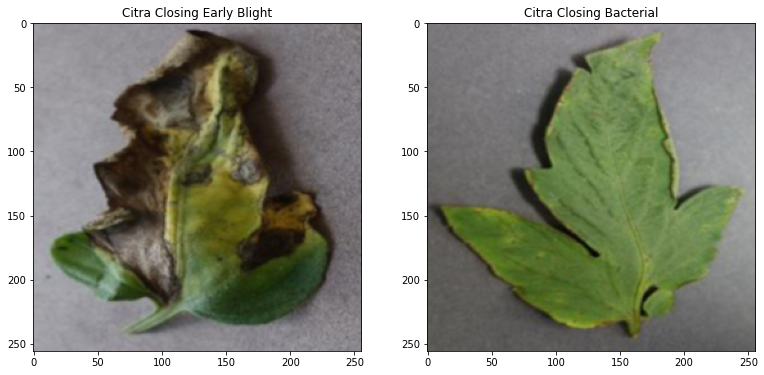

In [ ]:
for i in range(len(img_Tomato_Early_blight)):
  Tomato_Early_blight = cv2.GaussianBlur(img_Tomato_Early_blight[i],(3,3),0)
  gray_Early = cv2.cvtColor(Tomato_Early_blight, cv2.COLOR_BGR2RGB)

for i in range(len(img_Tomato_Bacterial_spot)):
  Tomato_Bacterial_spot = cv2.GaussianBlur(img_Tomato_Bacterial_spot[i],(3,3),0)
  gray_bacterial = cv2.cvtColor(Tomato_Bacterial_spot, cv2.COLOR_BGR2RGB)

#for i in range(len(img_blight)):
#  Tomato_Late_blight = cv2.GaussianBlur(img_Tomato_Late_blight[i],(3,3),0)
# gray_Late = cv2.cvtColor(Tomato_Late_blight, cv2.COLOR_BGR2RGB)

f, axarr = plt. subplots(1,2,figsize=(20,20))
plt.subplot(131),plt.imshow(gray_Early), plt.title('Citra Closing Early Blight')
plt.subplot(132),plt.imshow(gray_bacterial), plt.title('Citra Closing Bacterial')
#plt.subplot(133),plt.imshow(gray_Late), plt.title('Citra Closing Late Blight')
plt.show()


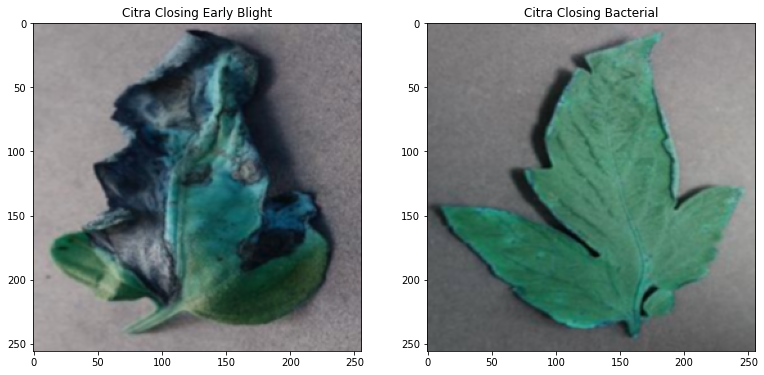

In [ ]:
# beri gaussian smoothing u/ memperbaiki kualitas citra
# ubah citra ke grayscale
Tomato_Early_blight = []
Tomato_Bacterial_spot = []
#Tomato_Late_blight = []

for i in range(len(img_Tomato_Early_blight)):
  Tomato_Early_blight = cv2.GaussianBlur(img_Tomato_Early_blight[i],(3,3),0)
  gray_Early = cv2.cvtColor(Tomato_Early_blight, cv2.COLOR_BGR2GRAY)

  # Deteksi Tepi Sobel
  # obtaining a horizontal and vertical Sobel filtering of the image
  early_sobelx = cv2.Sobel(gray_Early, cv2.CV_64F, 1, 0, ksize=3)
  early_sobely = cv2.Sobel(gray_Early, cv2.CV_64F, 0, 1, ksize=3)

  # image with both horizontal and vertical Sobel kernels applied
  early_sobelxy = cv2.addWeighted(cv2.convertScaleAbs(early_sobelx), 0.5, cv2.convertScaleAbs(early_sobely), 0.5, 0)


for i in range(len(img_Tomato_Bacterial_spot)):
  Tomato_Bacterial_spot = cv2.GaussianBlur(img_Tomato_Bacterial_spot[i],(3,3),0)
  gray_bacterial = cv2.cvtColor(Tomato_Bacterial_spot, cv2.COLOR_BGR2GRAY)

  # Deteksi Tepi Sobel
  # obtaining a horizontal and vertical Sobel filtering of the image
  bact_sobelx = cv2.Sobel(gray_bacterial, cv2.CV_64F, 1, 0, ksize=3)
  bact_sobely = cv2.Sobel(gray_bacterial, cv2.CV_64F, 0, 1, ksize=3)

  # image with both horizontal and vertical Sobel kernels applied
  bact_sobelxy = cv2.addWeighted(cv2.convertScaleAbs(bact_sobelx), 0.5, cv2.convertScaleAbs(bact_sobely), 0.5, 0)

#for i in range(len(img_blight)):
#  Tomato_Late_blight = cv2.GaussianBlur(img_Tomato_Late_blight[i],(3,3),0)
#  gray_Late = cv2.cvtColor(Tomato_Late_blight, cv2.COLOR_BGR2GRAY)

  # Deteksi Tepi Sobel
  # obtaining a horizontal and vertical Sobel filtering of the image
#  late_sobelx = cv2.Sobel(gray_Late, cv2.CV_64F, 1, 0, ksize=3)
#  late_sobely = cv2.Sobel(gray_Late, cv2.CV_64F, 0, 1, ksize=3)

  # image with both horizontal and vertical Sobel kernels applied
#  late_sobelxy = cv2.addWeighted(cv2.convertScaleAbs(late_sobelx), 0.5, cv2.convertScaleAbs(late_sobely), 0.5, 0)

f, axarr = plt. subplots(1,2,figsize=(20,20))
# Gray
# plt.subplot(131),plt.imshow(gray_Early, cmap = 'gray'), plt.title('Citra Closing Early Blight')
# plt.subplot(132),plt.imshow(gray_bacterial,cmap = 'gray'), plt.title('Citra Closing Bacterial')
# plt.subplot(133),plt.imshow(gray_Late,cmap = 'gray'), plt.title('Citra Closing Late Blight')
# plt.show()
# Gaussian
plt.subplot(131),plt.imshow(Tomato_Early_blight, cmap = 'gray'), plt.title('Citra Closing Early Blight')
plt.subplot(132),plt.imshow(Tomato_Bacterial_spot,cmap = 'gray'), plt.title('Citra Closing Bacterial')
#plt.subplot(133),plt.imshow(Tomato_Late_blight,cmap = 'gray'), plt.title('Citra Closing Late Blight')
plt.show()

# print(len(bact_sobelxy))

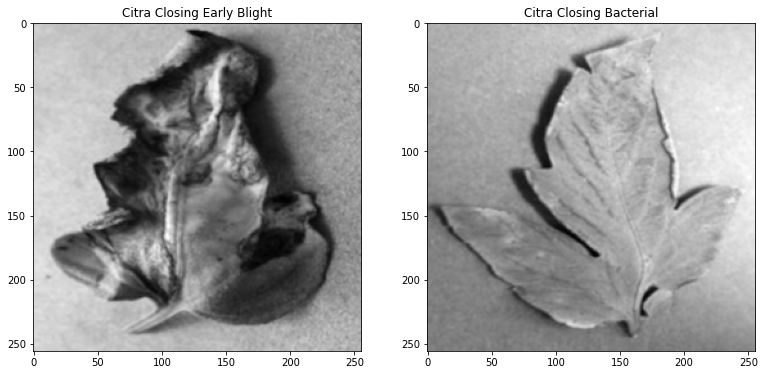

In [ ]:
# beri gaussian smoothing u/ memperbaiki kualitas citra
# ubah citra ke grayscale
Tomato_Early_blight = []
Tomato_Bacterial_spot = []
#Tomato_Late_blight = []

for i in range(len(img_Tomato_Early_blight)):
  Tomato_Early_blight = cv2.GaussianBlur(img_Tomato_Early_blight[i],(3,3),0)
  gray_Early = cv2.cvtColor(Tomato_Early_blight, cv2.COLOR_BGR2GRAY)

  # Deteksi Tepi Sobel
  # obtaining a horizontal and vertical Sobel filtering of the image
  early_sobelx = cv2.Sobel(gray_Early, cv2.CV_64F, 1, 0, ksize=3)
  early_sobely = cv2.Sobel(gray_Early, cv2.CV_64F, 0, 1, ksize=3)

  # image with both horizontal and vertical Sobel kernels applied
  early_sobelxy = cv2.addWeighted(cv2.convertScaleAbs(early_sobelx), 0.5, cv2.convertScaleAbs(early_sobely), 0.5, 0)

for i in range(len(img_Tomato_Bacterial_spot)):
  Tomato_Bacterial_spot = cv2.GaussianBlur(img_Tomato_Bacterial_spot[i],(3,3),0)
  gray_bacterial = cv2.cvtColor(Tomato_Bacterial_spot, cv2.COLOR_BGR2GRAY)

  # Deteksi Tepi Sobel
  # obtaining a horizontal and vertical Sobel filtering of the image
  bact_sobelx = cv2.Sobel(gray_bacterial, cv2.CV_64F, 1, 0, ksize=3)
  bact_sobely = cv2.Sobel(gray_bacterial, cv2.CV_64F, 0, 1, ksize=3)

  # image with both horizontal and vertical Sobel kernels applied
  bact_sobelxy = cv2.addWeighted(cv2.convertScaleAbs(bact_sobelx), 0.5, cv2.convertScaleAbs(bact_sobely), 0.5, 0)

#for i in range(len(img_blight)):
#  Tomato_Late_blight = cv2.GaussianBlur(img_Tomato_Late_blight[i],(3,3),0)
#  gray_Late = cv2.cvtColor(Tomato_Late_blight, cv2.COLOR_BGR2GRAY)

  # Deteksi Tepi Sobel
  # obtaining a horizontal and vertical Sobel filtering of the image
#  late_sobelx = cv2.Sobel(gray_Late, cv2.CV_64F, 1, 0, ksize=3)
#  late_sobely = cv2.Sobel(gray_Late, cv2.CV_64F, 0, 1, ksize=3)

  # image with both horizontal and vertical Sobel kernels applied
#  late_sobelxy = cv2.addWeighted(cv2.convertScaleAbs(late_sobelx), 0.5, cv2.convertScaleAbs(late_sobely), 0.5, 0)

f, axarr = plt. subplots(1,2,figsize=(20,20))
# Gray
plt.subplot(131),plt.imshow(gray_Early, cmap = 'gray'), plt.title('Citra Closing Early Blight')
plt.subplot(132),plt.imshow(gray_bacterial,cmap = 'gray'), plt.title('Citra Closing Bacterial')
#plt.subplot(133),plt.imshow(gray_Late,cmap = 'gray'), plt.title('Citra Closing Late Blight')
plt.show()

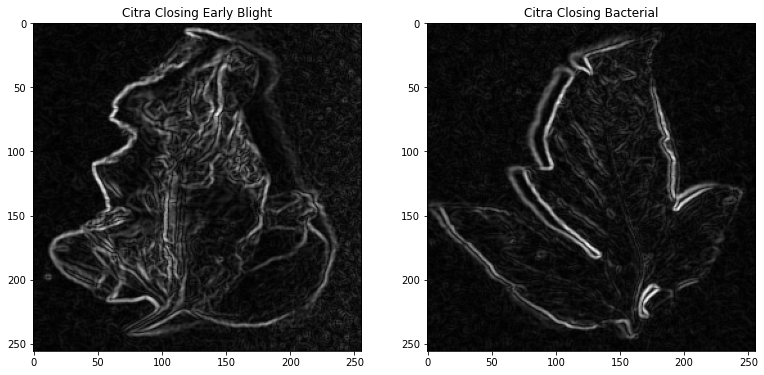

In [ ]:
# beri gaussian smoothing u/ memperbaiki kualitas citra
# ubah citra ke grayscale
Tomato_Early_blight = []
Tomato_Bacterial_spot = []
Tomato_Late_blight = []

for i in range(len(img_Tomato_Early_blight)):
  Tomato_Early_blight = cv2.GaussianBlur(img_Tomato_Early_blight[i],(3,3),0)
  gray_Early = cv2.cvtColor(Tomato_Early_blight, cv2.COLOR_BGR2GRAY)

  # Deteksi Tepi Sobel
  # obtaining a horizontal and vertical Sobel filtering of the image
  early_sobelx = cv2.Sobel(gray_Early, cv2.CV_64F, 1, 0, ksize=3)
  early_sobely = cv2.Sobel(gray_Early, cv2.CV_64F, 0, 1, ksize=3)

  # image with both horizontal and vertical Sobel kernels applied
  early_sobelxy = cv2.addWeighted(cv2.convertScaleAbs(early_sobelx), 0.5, cv2.convertScaleAbs(early_sobely), 0.5, 0)


for i in range(len(img_Tomato_Bacterial_spot)):
  Tomato_Bacterial_spot = cv2.GaussianBlur(img_Tomato_Bacterial_spot[i],(3,3),0)
  gray_bacterial = cv2.cvtColor(Tomato_Bacterial_spot, cv2.COLOR_BGR2GRAY)

  # Deteksi Tepi Sobel
  # obtaining a horizontal and vertical Sobel filtering of the image
  bact_sobelx = cv2.Sobel(gray_bacterial, cv2.CV_64F, 1, 0, ksize=3)
  bact_sobely = cv2.Sobel(gray_bacterial, cv2.CV_64F, 0, 1, ksize=3)

  # image with both horizontal and vertical Sobel kernels applied
  bact_sobelxy = cv2.addWeighted(cv2.convertScaleAbs(bact_sobelx), 0.5, cv2.convertScaleAbs(bact_sobely), 0.5, 0)

#for i in range(len(img_blight)):
#  Tomato_Late_blight = cv2.GaussianBlur(img_Tomato_Late_blight[i],(3,3),0)
#  gray_Late = cv2.cvtColor(Tomato_Late_blight, cv2.COLOR_BGR2GRAY)

  # Deteksi Tepi Sobel
  # obtaining a horizontal and vertical Sobel filtering of the image
#  late_sobelx = cv2.Sobel(gray_Late, cv2.CV_64F, 1, 0, ksize=3)
#  late_sobely = cv2.Sobel(gray_Late, cv2.CV_64F, 0, 1, ksize=3)

  # image with both horizontal and vertical Sobel kernels applied
#  late_sobelxy = cv2.addWeighted(cv2.convertScaleAbs(late_sobelx), 0.5, cv2.convertScaleAbs(late_sobely), 0.5, 0)

f, axarr = plt. subplots(1,2,figsize=(20,20))
# Gray
# plt.subplot(131),plt.imshow(gray_Early, cmap = 'gray'), plt.title('Citra Closing Early Blight')
# plt.subplot(132),plt.imshow(gray_bacterial,cmap = 'gray'), plt.title('Citra Closing Bacterial')
# plt.subplot(133),plt.imshow(gray_Late,cmap = 'gray'), plt.title('Citra Closing Late Blight')
# plt.show()
# Gaussian
plt.subplot(131),plt.imshow(early_sobelxy, cmap = 'gray'), plt.title('Citra Closing Early Blight')
plt.subplot(132),plt.imshow(bact_sobelxy,cmap = 'gray'), plt.title('Citra Closing Bacterial')
#plt.subplot(133),plt.imshow(late_sobelxy,cmap = 'gray'), plt.title('Citra Closing Late Blight')
plt.show()

# print(len(bact_sobelxy))

(<matplotlib.axes._subplots.AxesSubplot at 0x7f06473a4c10>,
 Text(0.5, 1.0, 'Citra Bacterial Spot'))

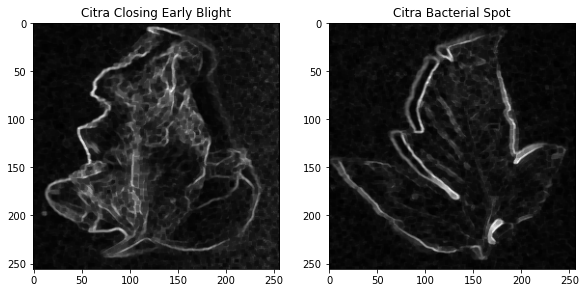

In [ ]:
#Operasi Morfologi – Closing

# Tomato Early blight

kernel = np.ones((3,3), np.uint8)
dilation = cv2.dilate(early_sobelxy, kernel, iterations=1)
closing_Early = cv2.erode(dilation, kernel, iterations=1)

# Tomato_Bacterial_spot
dilation = cv2.dilate(bact_sobelxy, kernel, iterations=1)
closing_Bacterial = cv2.erode(dilation, kernel, iterations=1)

# Tomato_Late_blight
#dilation = cv2.dilate(late_sobelxy, kernel, iterations=1)
#closing_Late = cv2.erode(dilation, kernel, iterations=1)

f, axarr = plt. subplots(1,2,figsize=(15,15))
plt.subplot(131),plt.imshow(closing_Early, cmap = 'gray'), plt.title('Citra Closing Early Blight')
plt.subplot(132),plt.imshow(closing_Bacterial, cmap = 'gray'), plt.title('Citra Bacterial Spot')
#plt.subplot(133),plt.imshow(closing_Late, cmap = 'gray'), plt.title('Citra Closing Late Blight')

(<matplotlib.axes._subplots.AxesSubplot at 0x7f0647303850>,
 Text(0.5, 1.0, 'Citra Thresholding Bacterial'))

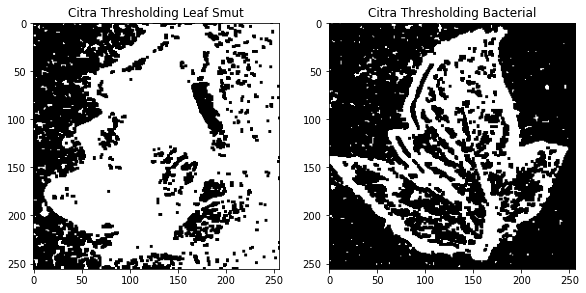

In [ ]:
# thresholding
# img_Early = cv2.cvtColor(img_leafsmut[0], cv2.COLOR_BGR2RGB)
# img_Earlygray = cv2.cvtColor(img_Early,cv2.COLOR_BGR2GRAY)

# img = cv2.cvtColor(img_Bacterial[2], cv2.COLOR_BGR2RGB)
# img_bactgray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

# img = cv2.cvtColor(img_brown_spot[0], cv2.COLOR_BGR2RGB)
# img_browngray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

thresh = 15
ret,th1 = cv2.threshold(closing_Early,thresh,255,cv2.THRESH_BINARY)
thresh = 20
ret,th2 = cv2.threshold(closing_Bacterial,thresh,255,cv2.THRESH_BINARY)
#thresh = 35
#ret,th3 = cv2.threshold(closing_Late,thresh,255,cv2.THRESH_BINARY)

# ret1, th1 = cv2.threshold(img_Earlygray,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
# ret1, th2 = cv2.threshold(img_bactgray,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
# ret1, th3 = cv2.threshold(img_browngray,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

plt.figure(figsize = (15,15))
plt.subplot(131),plt.imshow(th1, 'gray'), plt.title('Citra Thresholding Leaf Smut')
plt.subplot(132),plt.imshow(th2, 'gray'), plt.title('Citra Thresholding Bacterial')
#plt.subplot(133),plt.imshow(th3, 'gray'), plt.title('Citra Thresholding Brown Spot')